# Word Analysis

My first idea was to scrappe the rae web, where all words are indexed. The plan was to generate random words (from letters=list(map(chr, range(ord('a'), ord('z')+1)))) with a max of 23 letters (included) since this is the max in Spanish (without taking into consideration the "-"). However, to get each iteration from "https://dle.rae.es/{word}" would have been a problem.

Then, I get the spanish words from an existing repository for the user @JorgeDuenasLerin at Github. Specifically, "https://github.com/JorgeDuenasLerin/diccionario-espanol-txt".

In [61]:
import pandas as pd
import requests
import os
import matplotlib.pyplot as plt
from collections import Counter

In [62]:
# words
url = "https://raw.githubusercontent.com/JorgeDuenasLerin/diccionario-espanol-txt/master/0_palabras_todas.txt"
# prefixes
url_prefijos = "https://raw.githubusercontent.com/JorgeDuenasLerin/diccionario-espanol-txt/master/0_prefijos.txt"
# sufixes
url_sufijos = "https://raw.githubusercontent.com/JorgeDuenasLerin/diccionario-espanol-txt/master/0_subfijos.txt"

In [63]:
# content from file
response = requests.get(url)
palabras = response.text.splitlines()
# create df
df = pd.DataFrame(palabras, columns=['palabra'])
# show df
df.head()

,palabra
0,)
1,a
2,aba
3,ába
4,abaá


In [64]:
# bdrop first line
df = df.iloc[1:]
# reset index
df = df.reset_index(drop=True)
# add word length
df["longitud_palabra"] = df["palabra"].str.len()
# mostrar el dataframe
df.head()

,palabra,longitud_palabra
0,a,1
1,aba,3
2,ába,3
3,abaá,4
4,ababilla,8


In [65]:
# Backup
df_backup = df.copy()

In the following, I focus the code on the specific test/game of, given 10 random letters, to order them and write the larges word (subject to (i) a number of words >=5 [and <=10 for obvious reasons>] and (ii) a number of vowels <=6 and >=3).

In [66]:
# filter word lenght
df = df[(df['longitud_palabra'] >= 5) & (df['longitud_palabra'] <= 10)]
# reset index
df = df.reset_index(drop=True)
# show df
df.head()


,palabra,longitud_palabra
0,ababilla,8
1,ababílla,8
2,ababillaba,10
3,ababillado,10
4,ababilláis,10


In [67]:
# four df based on th main df for each vowel number case
df_3 = df[df['palabra'].str.lower().str.count('[aeiou]') == 3]
df_4 = df[df['palabra'].str.lower().str.count('[aeiou]') == 4]
df_5 = df[df['palabra'].str.lower().str.count('[aeiou]') == 5]
df_6 = df[df['palabra'].str.lower().str.count('[aeiou]') == 6]

print("Palabras con 3 vocales:\n"  , len(df_3))
print("\nPalabras con 4 vocales:\n", len(df_4))
print("\nPalabras con 5 vocales:\n", len(df_5))
print("\nPalabras con 6 vocales:\n", len(df_6))


Palabras con 3 vocales:
 116840

Palabras con 4 vocales:
 150864

Palabras con 5 vocales:
 51468

Palabras con 6 vocales:
 2253


Now I focus on the 6 vowels number because is the shortest, which is an advantage to study the words to face the challenge at "Cifras y Letras" TV contest

# HERE

In [68]:
#show the df
df_6.head()

,palabra,longitud_palabra
188,abaleabais,10
200,abalearais,10
207,abaleareis,10
218,abaleaseis,10
456,abaniqueo,9


In [69]:
# I add prefixes and suffixes in the dataframe
## prefixes
response_prefijos = requests.get(url_prefijos)
prefijos = response_prefijos.text.splitlines()
prefijos = [prefijo.replace('-', '') for prefijo in prefijos]

def empieza_por_prefijo(palabra, prefijos):
  for prefijo in prefijos:
    if palabra.startswith(prefijo):
      return prefijo
  return ""

df_6["prefijo"] = df_6["palabra"].apply(lambda x: empieza_por_prefijo(x, prefijos))


## sufixes
response_sufijos = requests.get(url_sufijos)
sufijos = response_sufijos.text.splitlines()
sufijos = [sufijo.replace('-', '') for sufijo in sufijos]

def termina_por_sufijo(palabra, sufijos):
  for sufijo in sufijos:
    if palabra.endswith(sufijo):
      return sufijo
  return ""

df_6["sufijo"] = df_6["palabra"].apply(lambda x: termina_por_sufijo(x, sufijos))

# Show the df after the changes
df_6.head()

C:\Users\alvar\AppData\Local\Temp\ipykernel_20792\3093132470.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_6["prefijo"] = df_6["palabra"].apply(lambda x: empieza_por_prefijo(x, prefijos))
C:\Users\alvar\AppData\Local\Temp\ipykernel_20792\3093132470.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_6["sufijo"] = df_6["palabra"].apply(lambda x: termina_por_sufijo(x, sufijos))


,palabra,longitud_palabra,prefijo,sufijo
188,abaleabais,10,a,
200,abalearais,10,a,
207,abaleareis,10,a,
218,abaleaseis,10,a,
456,abaniqueo,9,a,


In [70]:
df_6['sufijo_len'] = df_6['sufijo'].str.len()
df_6['prefijo_len'] = df_6['prefijo'].str.len()

print("Número de filas con sufijos de al menos 3 letras:", len(df_6[df_6['sufijo_len'] >= 3]))
print("Número de filas con prefijos de al menos 3 letras:", len(df_6[df_6['prefijo_len'] >= 3]))


Número de filas con sufijos de al menos 3 letras: 6
Número de filas con prefijos de al menos 3 letras: 26


C:\Users\alvar\AppData\Local\Temp\ipykernel_20792\417635450.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_6['sufijo_len'] = df_6['sufijo'].str.len()
C:\Users\alvar\AppData\Local\Temp\ipykernel_20792\417635450.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_6['prefijo_len'] = df_6['prefijo'].str.len()


In [71]:
df_6_sorted = df_6.sort_values('longitud_palabra', ascending=False).reset_index(drop=True)
df_6_sorted.index = df_6_sorted.index + 1
df_6_sorted.head()


,palabra,longitud_palabra,prefijo,sufijo,sufijo_len,prefijo_len
1,zulaquease,10,,,0,0
2,abaleabais,10,a,,0,1
3,abalearais,10,a,,0,1
4,abaleareis,10,a,,0,1
5,abaleaseis,10,a,,0,1


In [72]:
# Useful info to study
media_letras = df_6['longitud_palabra'].mean()
print("La media de letras de las palabras en df_6 es:", media_letras)

palabras_10_letras = df_6[df_6['longitud_palabra'] == 10]
num_palabras_10_letras = len(palabras_10_letras)
print("Número de palabras con 10 letras:", num_palabras_10_letras)

palabras_no_10_letras = df_6[df_6['longitud_palabra'] != 10]
num_palabras_no_10_letras = len(palabras_no_10_letras)
print("Número de palabras que no tienen 10 letras:", num_palabras_no_10_letras)


La media de letras de las palabras en df_6 es: 9.940079893475366
Número de palabras con 10 letras: 2118
Número de palabras que no tienen 10 letras: 135


In [73]:
df_6_sorted.to_csv(os.path.join("data", "df_6.csv"), index=False)


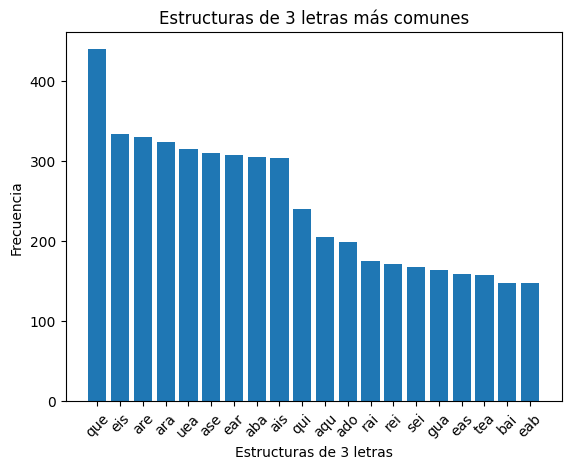

In [74]:
# Show the more common combs
estructuras = []
for palabra in df_6_sorted['palabra']:
  for i in range(len(palabra) - 2):
    estructuras.append(palabra[i:i+3])

conteo_estructuras = Counter(estructuras)

estructuras_comunes = conteo_estructuras.most_common(20)

estructuras, frecuencias = zip(*estructuras_comunes)
plt.bar(estructuras, frecuencias)
plt.xlabel('Estructuras de 3 letras')
plt.ylabel('Frecuencia')
plt.title('Estructuras de 3 letras más comunes')
plt.xticks(rotation=45)
plt.show()
